# Pathing

Based on flexible logarithmic spiral

    The polar equation of a logarithmic spiral is written as r=e^(a*theta), where r is the distance from the origin, e is Euler's number (about 1.618282), and theta is the angle traveled measured in radians (1 radian is approximately 57 degrees)
    The constant a is the rate of increase of the spiral. The sign of a determines the direction of rotation of the spiral (see below).

## The Hop

Based on sum on infered along changes in theta and a.

At any given r, theta:

> lon = rcos(theta); lat = rsin(theta)

In [97]:
# Build path fn
import numpy as np

def path(theta, a=0.05):
    r = np.exp(-a*theta)
    lat = r * np.sin(theta)
    lon = r * np.cos(theta)
    return(lat,lon)

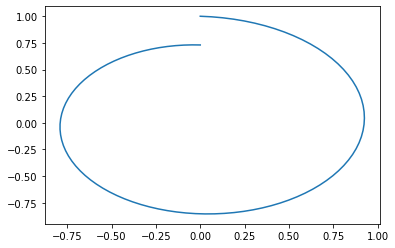

In [99]:
# Test path
from matplotlib import pyplot as plt

angles = np.linspace(0, 2*np.pi, 100)

coords = list(map(path, angles))
coords = list(zip(*coords))

plt.plot(coords[0], coords[1])
plt.show()

In [100]:
display(coords[0:10])

[(0.0,
  0.06322297389066216,
  0.12579155953333288,
  0.18745812549552573,
  0.24798023666031557,
  0.3071215968929107,
  0.364652961040575,
  0.42035301279009085,
  0.47400920506633487,
  0.5254185598272464,
  0.5743884242937544,
  0.6207371808472646,
  0.6642949080312549,
  0.7049039903064998,
  0.7424196744305255,
  0.7767105705601506,
  0.8076590964104224,
  0.8351618630429452,
  0.8591300011004979,
  0.8794894265519699,
  0.8961810452609645,
  0.9091608959419383,
  0.9184002313184254,
  0.9238855375477397,
  0.9256184922245514,
  0.9236158615209134,
  0.917909337261694,
  0.9085453149710168,
  0.8955846141562794,
  0.8791021423207483,
  0.8591865044127208,
  0.8359395596280027,
  0.8094759276821665,
  0.779922446858998,
  0.7474175863209976,
  0.712110815336114,
  0.674161932231477,
  0.6337403560291505,
  0.5910243838504144,
  0.5462004172932883,
  0.49946216109259534,
  0.4510097974624495,
  0.40104913959740796,
  0.3497907678703807,
  0.2974491523126579,
  0.24424176499390388,

## Flexing a

To help minimize missed businesses along the spiral path, we can flex a as a function of the expected sum new finds over a loop (inference may pass through multiple models to accomplish, so caching is important for performance).

Every n searches:

> $$a = a + c*\frac{50}{\sum_{0}^{2\pi} E(a)}$$

> The summation can be approximated by stepping through a constant array radians where angles=np.linspace(0, 2*np.pi, 1000)

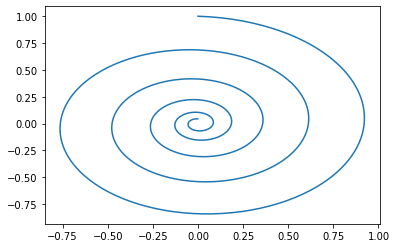

In [101]:
# Build test list with multiple a's
combos = list(zip(np.linspace(0, 100*np.pi, 10000), np.arange(0.05, 0.1, 0.00005)))

coords = []
for combo in combos:
    pair = path(combo[0], combo[1])
    coords.append(pair)
    
coords = list(zip(*coords))

plt.plot(coords[0], coords[1])
plt.show()

### Controlling flex to accomplish area coverage

We can calculate the maximum a by finding a for r_max (the furthest point away from the city.

In [102]:
r_max = 1.1 # This is huge is not scaled down.  

a_max = [np.log(r_max) / theta for theta in np.linspace(0.001, 2*np.pi, 12)]

a_max = min(a_max)/10
a_max

0.0015169086242835647

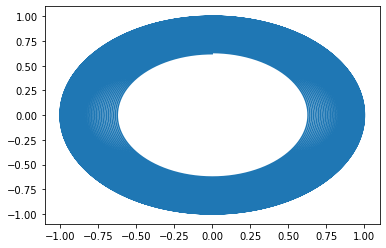

In [103]:
# Replotting with a_max

combos = list(zip(np.linspace(0, 100*np.pi, 100000), np.linspace(a_max/100000, a_max, 100000)))

coords = []
for combo in combos:
    pair = path(combo[0], combo[1])
    coords.append(pair)
    
coords = list(zip(*coords))

plt.plot(coords[0], coords[1])
plt.show()

### An unstable path

The logarithmic spiral is incredibly sensitive to scaling in a. Constant c will control the deflection in ideal a.